### 1.3 Классы и объекты

Методы обращения к классу и его атрибутам
- getattr(obj, name[, default]) - возвращает значение атрибута объекта;
- hasattr(obj, name) - проверяет на наличие атрибута name в obj;
- setattr(obj, name, value) - задает значение атрибута (если атрибут не существует, то он создаётся);
- delattr(obj, name) - удаляет атрибут с именем name в obj

Служебные команды
- \_\_doc\_\_ - содержит строку с описанием класса;
- \_\_dict\_\_ - содержит набор атрибутов экземпляра класса;

    class Car:
        mark = chevrolet
        color = blue

    Car.color
    -> blue
    
    Car.color = yellow
    Car.color
    -> yellow

In [ ]:
def str_to_attr():
    """Преобразует атрибуты в задании к виду
    аттрибутов для класса"""
    def count_colon(el, count_col, count_quot_m, count_space):
        # проверка на :
        if el == ':':
            count_col += 1
            el = ' ='
        # для игнорирования ' ' между ""    
        if el == '"' or el == "'":
            count_quot_m += 1
        # если : и не между " "
        if count_col and count_quot_m % 2 == 0:
            if el == ' ':
                count_space += 1    
                if count_space % 2 == 0:
                    el = '\n'
                
        return el, count_col, count_quot_m, count_space
    
    
    task_str = input()
    lines = ''
    count_col = 0
    count_quot_m = 0
    count_space = 0
    
    print()
    for i in range(len(task_str)):
        el, count_col, count_quot_m, count_space = (
            count_colon(task_str[i], count_col, count_quot_m, count_space)
        )
        
        if el == '\n':
            print(4*' ' + lines)
            lines = ''
        else:
            lines += el
    else:
        print(4*' ' + lines)


str_to_attr()

In [ ]:
class Car:
    pass


setattr(Car, 'model', 'Тойота')
setattr(Car, 'color', 'Розовый')
setattr(Car, 'number', 'П111УУ77')
print(Car.__dict__['color'])

In [ ]:
class Notes:
    uid = 1005435
    title = "Шутка"
    author = "И.С. Бах"
    pages = 2
   
print(getattr(Notes, 'author'))

In [ ]:
class Dictionary: 
    rus = "Питон"
    eng = "Python"

print(getattr(Dictionary, 'rus_word', False))

In [ ]:
class TravelBlog:
    total_blogs = 0

tb1 = TravelBlog()
setattr(tb1, 'name', 'Франция')
setattr(tb1, 'days', 6)
setattr(TravelBlog, 'total_blogs', 1)
tb2 = TravelBlog()
setattr(tb2, 'name', 'Италия')
setattr(tb2, 'days', 5)
TravelBlog.total_blogs += 1

In [ ]:
class Figure:
    type_fig = 'ellipse'
    color = 'red'

fig1 = Figure()
setattr(fig1, 'start_pt', (10, 5))
setattr(fig1, 'end_pt', (100, 20))
setattr(fig1, 'color', 'blue')
delattr(fig1, 'color')
print(' '.join(fig1.__dict__.keys()))

In [ ]:
class Person:
    name = 'Сергей Балакирев'
    job = 'Программист'
    city = 'Москва'

p1 = Person()
print('job' in p1.__dict__)

In [ ]:
class Point:
    tp = '1'

del Point.tp

In [ ]:
Point.__dict__

### 1.4 Методы классов

self

In [ ]:
class MediaPlayer:
    def open(self, file):
        self.filename = file

    
    def play(self):
        print(f'Воспроизведение {self.filename}')


media1 = MediaPlayer()
media2 = MediaPlayer()

media1.open('filemedia1')
media2.open('filemedia2')

media1.play()
media2.play()

In [ ]:
MediaPlayer.play(media1)

Задание 2

In [ ]:
class Graph:
    LIMIT_Y = [0, 10]

    
    def set_data(self, data):
        self.data = data

    
    def draw(self):
        left, right = self.LIMIT_Y
        res = filter(lambda x: left <= x <= right, self.data)
        print(*res)


graph_1 = Graph()
graph_1.set_data([10, -5, 100, 20, 0, 80, 45, 2, 5, 7])
graph_1.draw()

In [ ]:
import sys

class StreamData:
    def create(self, fields, lst_values):
        if len(fields) != len(lst_values):
            return False

        self.__dict__ = dict(zip(fields, lst_values))
        return True

        
class StreamReader:
    FIELDS = ('id', 'title', 'pages')

    def readlines(self):
        lst_in = list(map(str.strip, sys.stdin.readlines()))  # считывание списка строк из входного потока
        sd = StreamData()
        res = sd.create(self.FIELDS, lst_in)
        return sd, res


sr = StreamReader()
data, result = sr.readlines()

Задание 4

In [ ]:
import sys

# программу не менять, только добавить два метода
lst_in = list(map(str.strip, sys.stdin.readlines()))  # считывание списка строк из входного потока
lst_in = ['1 Сергей 35 120000', '2 Федор 23 12000', '3 Иван 13 1200']

class DataBase:
    lst_data = []
    FIELDS = ('id', 'name', 'old', 'salary')

    # здесь добавлять методы
    def insert(self, data):
        for el in data:
            res = dict(zip(self.FIELDS, el.split()))
            self.lst_data.append(res)


    def select(self, a, b):
        return self.lst_data[a:b+1]


db = DataBase()
db.insert(lst_in)
db.select(1, 2)

Задание 5. Переводчик

Доработать, добавить БД для сохранения данных.

In [ ]:
class Translator:
    def add(self, eng, rus):
        if 'tr' not in self.__dict__:
            self.tr = {}

        self.tr.setdefault(eng, [])
        if rus not in self.tr[eng]:
            self.tr[eng].append(rus)
            

    def remove(self, eng):
        self.tr.pop(eng, False)

    
    def translate(self, eng):
        return self.tr[eng]


tr = Translator()
tr.add("tree", "дерево")
tr.add("car", "машина")
tr.add("car", "автомобиль")
tr.add("leaf", "лист")
tr.add("river", "река")
tr.add("go", "идти")
tr.add("go", "ехать")
tr.add("go", "ходить")
tr.add("milk", "молоко")
tr.remove('car')
print(*tr.translate('go'))

### 1.5 Инициализатор \_\_init\_\_ и финализатор \_\_del\_\_

In [ ]:
import sqlite3

In [ ]:
conn = sqlite3.connect('example.db')
cursor = conn.cursor()


In [ ]:
class Point:
    color = 'red'
    circle = 2

    def __init__(self):
        print('вызов __init__')
        self.x = 0
        self.y = 0

    def set_coords(self, x, y):
        self.x = x
        self.y = y

    def get_coords(self):
        return self.x, self.y


pt = Point()
pt.set_coords(1, 2)
print(pt.__dict__)

In [ ]:
class Point:
    def __init__(self, x, y, color='black'):
        self.x = x
        self.y = y
        self.color = color

points = []
for num, i in enumerate(range(1, 2000, 2), 1):
    points.append(Point(i, i))

points[1].color = 'yellow'

In [ ]:
points[1].color

Задание 4

In [ ]:
import random

class Line:
    def __init__(self, a, b, c, d):
        self.sp = a, b,
        self.ep = c, d,


class Rect:
    def __init__(self, a, b, c, d):
        self.sp = a, b,
        self.ep = c, d,


class Ellipse:
    def __init__(self, a, b, c, d):
        self.sp = a, b,
        self.ep = c, d,        


def add_obj():
    coords = [random.randint(-100, 100) for i in range(4)]
    return random.choice([Line, Rect, Ellipse])(*coords)


def line_to_zero(obj):
    if type(obj).__name__ == 'Line':
        obj.__init__(0, 0, 0, 0)
    return obj    


elements = [add_obj() for i in range(217)]
elements = [line_to_zero(el) for el in elements]

Подвиг 5

In [ ]:
class TriangleChecker:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c

        
    def is_triangle(self):
        lst = [self.a, self.b, self.c]
        # 1
        for el in lst:
            if (
                type(el) != int and
                type(el) != float
            ):
                return 1
            elif el <= 0:
                return 1
        # 2, 3
        if (self.a + self.b > self.c and
            self.b + self.c > self.a and
            self.a + self.c > self.b):  
            return 3
        else:
            return 2


a, b, c = map(int, input().split())        
tr = TriangleChecker(a, b, c)
print(tr.is_triangle())

In [ ]:
tests = [[3, 4, 5], [5, 4, 3], [4, 3, 5], [1, 1, 1], [1, 7, 8]]
for el in tests:
    tr_t = TriangleChecker(*el)
    print(tr_t.is_triangle())

Подвиг 6

In [ ]:
class Graph:
    def __init__(self, data, is_show=True):
        self.data = data.copy()
        self.is_show = is_show


    def set_data(self, data):
        self.data = data.copy()


    def show_table(self):
        if self.is_show:
            print(*self.data)
        else:
            print('Отображение данных закрыто')
        

    def show_graph(self):
        if self.is_show:
            print(f'Графическое отображение данных: {self.data}')
        else:
            print('Отображение данных закрыто')

    
    def show_bar(self):
        if self.is_show:
            print('Столбчатая диаграмма:', *self.data)
        else:
            print('Отображение данных закрыто')

    
    def set_show(self, fl_show):
        self.is_show = fl_show


# data_graph = list(map(int, input().split()))
data_graph = [8, 11, 10, -32, 0, 7, 18]
gr = Graph(data_graph)
gr.show_bar()
gr.set_show(fl_show=False)
gr.show_table()

Подвиг 7

In [ ]:
class CPU:
    def __init__(self, name, fr):
        self.name = name
        self.fr = fr    
    
    
class Memory:
    def __init__(self, name, volume):
        self.name = name
        self.volume = volume
        
    
class MotherBoard:
    def __init__(self, name, cpu, mem_slots):
        self.name = name
        self.cpu = cpu
        self.total_mem_slots = 4
        self.mem_slots = mem_slots


    def get_config(self):
        lst = [f'{mem.name} - {mem.volume}' for mem in self.mem_slots]
        return [f'Материнская плата: {self.name}',
                f'Центральный процессор: {self.cpu.name}, {self.cpu.fr}',
                f'Слотов памяти: {self.total_mem_slots}',
                f'Память: {"; ".join(lst)}'
                
               ]

cpu = CPU('asus', 3333)
mem1 = Memory('Kingston', 6777)
mem2 = Memory('Kingston', 6777)
mb = MotherBoard('Aurus', cpu, [mem1, mem2])
mb.get_config()

Подвиг 8

In [ ]:
class Cart:
    def __init__(self, goods=[]):
        self.goods = goods


    def add(self, gb):
        self.goods.append(gb)

    
    def remove(self, indx):
        self.goods.pop(indx)


    def get_list(self):
        return [f"{product.name}: {product.price}" for product in self.goods]
        

class Table:
    def __init__(self, name, price):
        self.name = name
        self.price = price
        
    
class TV:
    def __init__(self, name, price):
        self.name = name
        self.price = price


class Notebook:
    def __init__(self, name, price):
        self.name = name
        self.price = price


class Cup:
    def __init__(self, name, price):
        self.name = name
        self.price = price


tv1 = TV('Samsung', 23000)
tv2 = TV('Philips', 23500)
table = Table('Atlant', 7000)
notebook1 = Notebook('Asus', 125000)
notebook2 = Notebook('Dell', 120000)
cup = Cup('Sun', 230)

cart = Cart()
for el in [tv1, tv2, table, notebook1, notebook2, cup]:
    cart.add(el)

cart.get_list()    

Подвиг 9 

In [ ]:
class ListObject:
    
    def __init__(self, data, next_obj=None):
        self.data = data
        self.next_obj = next_obj

    def link(self, obj):
        self.next_obj = obj


lst_in = ['1. Первые шаги в ООП',
          '1.1 Как правильно проходить этот курс',
          '1.2 Концепция ООП простыми словами',
          '1.3 Классы и объекты. Атрибуты классов и объектов',
          '1.4 Методы классов. Параметр self',
          '1.5 Инициализатор init и финализатор del',
          '1.6 Магический метод new. Пример паттерна Singleton',
          '1.7 Методы класса (classmethod) и статические методы (staticmethod)']    

head_obj = ListObject(lst_in[0], next_obj=ListObject(lst_in[1]))
any_obj = head_obj.next_obj
# next_obj = ListObject.next_obj

# current = 0
# following = 1

# def res(current=0, following=1):
#     head_obj = ListObject(lst_in[current], ListObject(lst_in[following]))
#     if following < len(lst_in):
#         current += 1
#         following += 1
#         res(current, following)
        
#     return head_obj
print(any_obj.__dict__)
for i in range(1, len(lst_in) - 1):
    any_obj.link(ListObject(lst_in[i+1]))
    any_obj = any_obj.next_obj
    print(any_obj.__dict__)
    # var = lst_in[i+2] if i+2 <= len(lst_in) else None
    

In [ ]:
head_obj = ListObject(lst_in[0], next_obj=ListObject(lst_in[1]))
head_obj.next_obj.link(ListObject(lst_in[2]))
head_obj.next_obj.next_obj.link(ListObject(lst_in[3]))

In [ ]:
head_obj = ListObject(lst_in[0], next_obj=ListObject(lst_in[1]))
any_obj = head_obj.next_obj

for i in range(1, 6):
    any_obj.link(ListObject(lst_in[i+1]))
    any_obj = any_obj.next_obj


Большой подвиг 10. Написать Сапёр

In [ ]:
from random import randint

class Cell:
    def __init__(self, mine=False, around_mines=0, fl_open=False):
        self.around_mines = around_mines
        self.mine = mine
        self.fl_open = fl_open
    

class GamePole:
    def __init__(self, N, M):
        self.N = N
        self.M = M
        self.init()

        
    def init(self):
        # creating mine coordinates
        self.mines_positions = self.create_mine_coords()
        # creating pole
        self.pole = self.create_game_pole()


    def create_mine_coords(self):
        M, N = self.M, self.N
        mines_positions = set()
        while len(mines_positions) < M:
            mines_positions.add(tuple(map(randint, [0, 0], [N-1, N-1])))
        return mines_positions


    def create_game_pole(self):
        N = self.N
        mines_positions = self.mines_positions
        game_pole = []
        for i in range(N):
            line = []
            for j in range(N):
                mine = False
                if (i, j) in mines_positions:
                    mine = True
                around_mines = self.how_mines((i, j), mines_positions)
                c1 = Cell(mine, around_mines)
                line.append(c1)
            game_pole.append(line)
                    
        return game_pole

    
    def how_mines(self, cell_coord, mines_positions, cube=3):
        #benchmark
        bm = cell_coord[0] - 1, cell_coord[1] - 1
        
        around_mines = 0
        for i in range(bm[0], cube+bm[0]):
            for j in range(bm[1], cube+bm[1]):
                if (i, j) != cell_coord:
                    if (i, j) in mines_positions:
                        around_mines += 1
    
        return around_mines

    
    def play(self):
        N = self.N
        print('Если хотите прекратить игру, наберите n')
        print(f'Введите координаты в диапазоне:\n'
              f'x: 1-{N}\n'
              f'y: 1-{N}\n'
             )
        self.show()
        while True:
            user_request = input()
            if user_request != 'n':
                x, y = map(int, user_request.split())
                pole_game.pole[x-1][y-1].fl_open = True
                self.show()
                if pole_game.pole[x-1][y-1].mine == True:
                    print('Game over')
                    break
            else:
                break
        
            
    def show(self):
        for line in self.pole:
            for el in line:
                if el.fl_open == False:
                    print('#', end=' ')
                elif el.fl_open == True: 
                    print(['*', el.around_mines][el.mine == False], end=' ')
            print('')
            

N = 10
M = 12
pole_game = GamePole(N, M)
# pole_game.show()

In [ ]:
# pole_game.play()

### 1.6 Магический метод \_\_new\_\_

In [2]:
class Point:
    def __new__(cls, *args, **kwargs):
        print('вызов __new__ для ' + str(cls))


    def __init__(self, x=0, y=0):
        print('вызов __init__ для ' + str(self))
        self.x = x
        self.y = y


pt = Point(1, 2)
print(pt)

вызов __new__ для <class '__main__.Point'>
None


Что проитсходит:
* cls ссылается на класс
* init ссылается на экземпляр класса
* в такой конструкции при создании экземпляра класса, pt не ссылается на экземпляр

Что делать?
* \_\_new\_\_ должен возвращать адрес нового созданного объекта
* вернем адрес нового созданного объекта из **базового класса**
* `super().__new__(cls)`

In [3]:
class Point:
    def __new__(cls, *args, **kwargs):
        print('вызов __new__ для ' + str(cls))
        return super().__new__(cls)

    def __init__(self, x=0, y=0):
        print('вызов __init__ для ' + str(self))
        self.x = x
        self.y = y


pt = Point(1, 2)
print(pt)

вызов __new__ для <class '__main__.Point'>
вызов __init__ для <__main__.Point object at 0x0000016A6A509730>


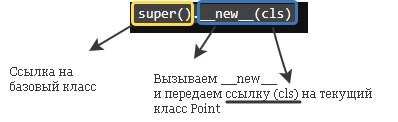

с версии Python 3.0 все классы автоматически и не явно наследуются от базового класса object

Подвиг 6

In [4]:
class AbstractClass:
    def __new__(cls, *args, **kwargs):
        return "Ошибка: нельзя создавать объекты абстрактного класса"


AbstractClass()

'Ошибка: нельзя создавать объекты абстрактного класса'

Подвиг 7

In [5]:
class SingletonFive:
    __instance = None
    __count = 0

    def __new__(cls, *args, **kwargs):
        if cls.__count != 5:
            cls.__count += 1
            cls.__instance = super().__new__(cls)
        return cls.__instance

        
    def __init__(self, name):
        self.name = name


objs = [SingletonFive(str(n)) for n in range(10)] # эту строчку не менять
objs

Подвиг 8

In [27]:
TYPE_OS = 1 # 1 - Windows; 2 - Linux

class DialogWindows:
    name_class = "DialogWindows"


class DialogLinux:
    name_class = "DialogLinux"


class Dialog:
    __obj_class = None
    
    def __new__(cls, *args, **kwargs):
        obj = DialogWindows() if TYPE_OS == 1 else DialogLinux()
        setattr(obj, 'name', *args)
        return obj
    

dlg = Dialog('test')
dlg.name

'test'

In [25]:
dlg.__dict__

{'name': 'test'}

Подвиг 9

In [28]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def clone(self):
        return Point(self.x, self.y)


x = 5
y = 5
pt = Point(x, y)
pt_clone = pt.clone()

Подвиг 10

In [ ]:
# Здесь объявляется класс Factory
class Factory:
    def build_sequence(self):
        return []

    def build_number(self, string):
        return float(string)


class Loader:
    def parse_format(self, string, factory):
        seq = factory.build_sequence()
        for sub in string.split(","):
            item = factory.build_number(sub)
            seq.append(item)

        return seq


# эти строчки не менять!
ld = Loader()
s = input()
res = ld.parse_format(s, Factory())

In [2]:
a = {1, 2, 3}
type(a)

set

### 1.7 Методы класса (classmethod) и статические методы (staticmethod)